In [1]:
from os import walk
import pandas as pd
from numpy import mean
import matplotlib.pyplot as plt
import seaborn as sns

## get mean values for all confgurations in 12 - not useful any more

In [2]:
# _, _, filenames = next(walk('./test_results/12/'))
# configurations = []
# count = 2
# insertions_durations = {} # {(k, consistency): [times]}
# queries_durations = {} # {(k, consistency): [times]}
# for filename in filenames:
#     k, consistency = filename.split('_')[:2]
#     configuration = (k, consistency)
#     configurations.append(configuration)
#     with open(f'./test_results/12/{filename}') as f:
#         insertions_duration = float(f.readline().strip('\n').split(' ')[1])
#         queries_duration = float(f.readline().strip('\n').split(' ')[1])

#         if configuration not in insertions_durations:
#             insertions_durations[configuration] = []
#         else:
#             insertions_durations[configuration].append(insertions_duration)
            
#         if configuration not in queries_durations:
#             queries_durations[configuration] = []
#         else:
#             queries_durations[configuration].append(queries_duration)

In [3]:
# # mean times for each configuration in new txt file
# for configuration in configurations:
#     k, consistency = configuration
#     with open(f'./test_results/3/mean/{k}_{consistency}.txt', 'w') as f:
#         f.write(f'Insertions: {mean(insertions_durations[configuration])}\n')
#         f.write(f'Queries: {mean(queries_durations[configuration])}\n')

## get mean values for all confgurations in 3 - not useful any more

In [4]:
# _, _, filenames = next(walk('./test_results/3/'))
# configurations = []
# requests_durations = {} # {(k, consistency): [durations]}
# stale_reads = {} # {(k, consistency): [stale_reads]}
# for filename in filenames:
#     k, consistency = filename.split('_')[:2]
#     configuration = (k, consistency)
#     configurations.append(configuration)
#     with open(f'./test_results/3/{filename}') as f:
#         requests_duration = float(f.readline().strip('\n'))
#         stale_readz = int(f.readline().strip('\n').split(' ')[2])

#         if configuration not in requests_durations:
#             requests_durations[configuration] = []
#         else:
#             requests_durations[configuration].append(requests_duration)
            
#         if configuration not in stale_reads:
#             stale_reads[configuration] = []
#         else:
#             stale_reads[configuration].append(stale_readz)

In [5]:
# # mean times for each configuration in new txt file
# for configuration in configurations:
#     k, consistency = configuration
#     with open(f'./test_results/3/mean/{k}_{consistency}.txt', 'w') as f:
#         f.write(f'{mean(requests_durations[configuration])}\n')
#         f.write(f'Stale reads: {mean(stale_reads[configuration])}\n')

# Create the main dataframe

In [7]:
df = pd.DataFrame(columns=['type', 'n_replicas', 'consistency', 'duration', 'stale_reads'])

# insertions and queries
_, _, filenames = next(walk('./test_results/12/'))
for filename in filenames:
    k, consistency = filename.strip('.txt').split('_')[:2]
    with open('./test_results/12/' + filename) as f:
        insertions_duration = float(f.readline().strip('\n').split(' ')[1])
        df = df.append({
            'type': 'insertions',
            'n_replicas': int(k),
            'consistency': consistency,
            'duration': insertions_duration,
        }, ignore_index = True)
        
        queries_duration = float(f.readline().strip('\n').split(' ')[1])
        df = df.append({
            'type': 'queries',
            'n_replicas': int(k),
            'consistency': consistency,
            'duration': queries_duration,
        }, ignore_index = True)

# requests
_, _, filenames = next(walk('./test_results/3/'))
for filename in filenames:
    k, consistency = filename.strip('.txt').split('_')[:2]
    with open('./test_results/3/' + filename) as f:
        requests_duration = float(f.readline().strip('\n'))
        stale_reads = float(f.readline().strip('\n').split(' ')[2])
        df = df.append({
            'type': 'requests',
            'n_replicas': int(k),
            'consistency': consistency,
            'duration': requests_duration,
            'stale_reads': stale_reads,
        }, ignore_index = True)

In [8]:
df = df.sort_values('n_replicas')

In [9]:
df_insertions = df[df['type'] == 'insertions']
df_queries = df[df['type'] == 'queries']
df_requests = df[df['type'] == 'requests']

In [10]:
df_requests

,type,n_replicas,consistency,duration,stale_reads
54,requests,1,linearizability,14.357336,0.00
49,requests,1,eventual,15.746613,0.00
42,requests,2,eventual,15.141470,0.00
52,requests,2,linearizability,17.510765,0.00
46,requests,3,eventual,14.143795,0.00
53,requests,3,linearizability,20.192955,0.00
45,requests,4,eventual,12.246307,3.75
59,requests,4,linearizability,22.255804,0.00
43,requests,5,eventual,10.829226,6.00
58,requests,5,linearizability,24.804585,0.00


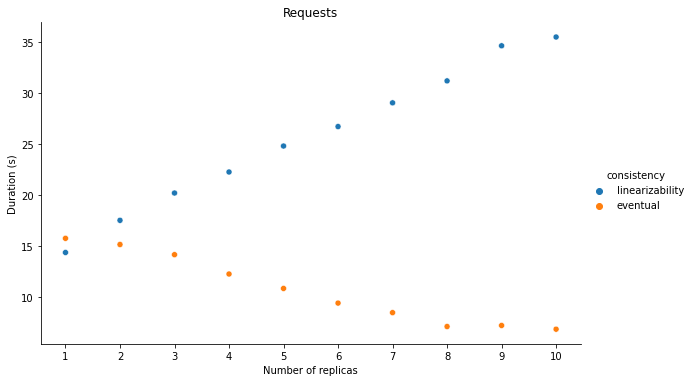

In [46]:
sns.relplot(
    data = df_requests,
    x = 'n_replicas',
    y = 'duration',
    hue = 'consistency',
    kind = 'scatter',
    height = 5,
    aspect = 1.61803399,
)
plt.ylabel('Duration (s)')
plt.xlabel('Number of replicas')
plt.xticks(list(range(1, 11)))
plt.title('Requests')
plt.savefig('./test_results/plots/requests.png', bbox_inches="tight")
plt.show()

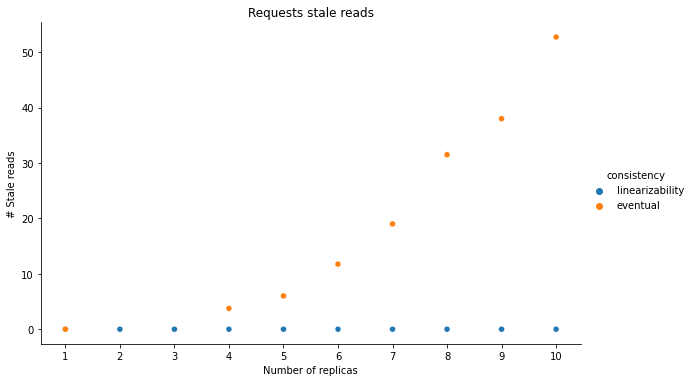

In [47]:
sns.relplot(
    data = df_requests,
    x = 'n_replicas',
    y = 'stale_reads',
    hue = 'consistency',
    kind = 'scatter',
    height = 5,
    aspect = 1.61803399,
)
plt.ylabel('# Stale reads')
plt.xlabel('Number of replicas')
plt.xticks(list(range(1, 11)))
plt.title('Requests stale reads')
plt.savefig('./test_results/plots/stale_reads.png', bbox_inches="tight")
plt.show()

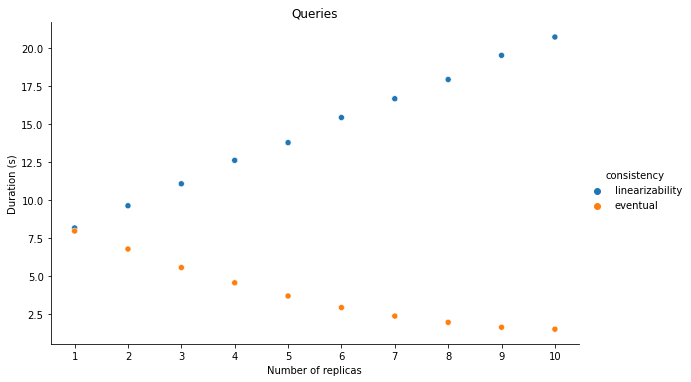

In [48]:
sns.relplot(
    data = df_queries,
    x = 'n_replicas',
    y = 'duration',
    hue = 'consistency',
    kind = 'scatter',
    height = 5,
    aspect = 1.61803399,
)
plt.ylabel('Duration (s)')
plt.xlabel('Number of replicas')
plt.xticks(list(range(1, 11)))
plt.title('Queries')
plt.savefig('./test_results/plots/queries.png', bbox_inches="tight")
plt.show()

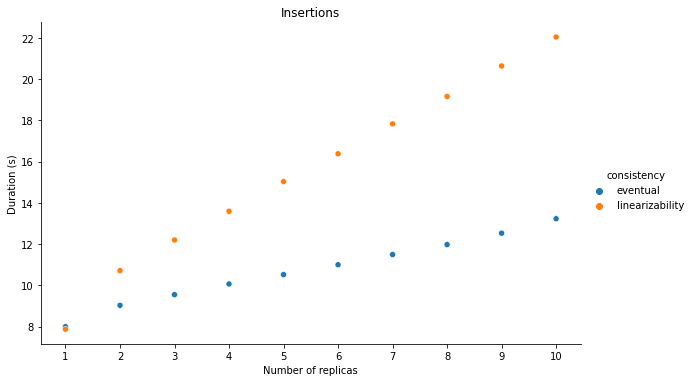

In [49]:
sns.relplot(
    data = df_insertions,
    x = 'n_replicas',
    y = 'duration',
    hue = 'consistency',
    kind = 'scatter',
    height = 5,
    aspect = 1.61803399,
)
plt.ylabel('Duration (s)')
plt.xlabel('Number of replicas')
plt.xticks(list(range(1, 11)))
plt.title('Insertions')
plt.savefig('./test_results/plots/insertions.png', bbox_inches="tight")
plt.show()